In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm

### Task 1: read the x/y data points from csv file

In [2]:
filename = 'datapoints.csv'
data = pd.read_csv(filename)
data.head(3)

,x,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478


In [3]:
data.describe()

,x,y
count,20.000000,20.000000
mean,0.500000,1.328701
std,0.311373,0.832933
min,0.000000,0.019630
25%,0.250000,0.540681
50%,0.500000,1.392299
75%,0.750000,1.941464
max,1.000000,2.998458


### Task 2: Create a scatterplot of the data - method 1

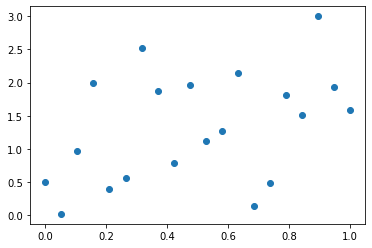

In [4]:
x = data['x']
y = data['y']
plt.plot(x,y,'o')

___

### Task 2: Create a scatterplot of the data - method 2

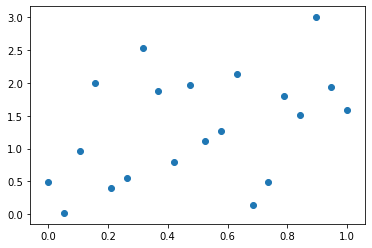

In [5]:
x = data['x']
y = data['y']
plt.scatter(x,y)

### Extra: The Correct Linear Regression Line

In [26]:
x1 = sm.add_constant(x)

In [27]:
results = sm.OLS(y,x1).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.730
Date:                Thu, 16 Apr 2020   Prob (F-statistic):             0.0694
Time:                        12:24:35   Log-Likelihood:                -22.327
No. Observations:                  20   AIC:                             48.65
Df Residuals:                      18   BIC:                             50.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7746      0.336      2.308      0.033       0.069       1.480
x              1.1083      0.574      1.931      0.069      -0.097       2.314
==============================================================================
Omnibus:                        0.333   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.489
Skew:                           0.195   Prob(JB):                        0.783
Kurtosis:                       2.341   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

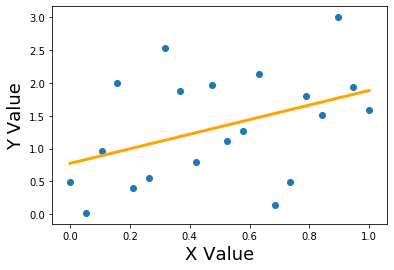

In [29]:
plt.scatter(x,y)


# Define the regression equation.
yhat = 1.1083*x + 0.7746


# Plot the regression line 
fig = plt.plot(x,yhat, lw=3, c='orange', label ='regression line')



# Label the axes
plt.xlabel('X Value', fontsize = 18)
plt.ylabel('Y Value', fontsize = 18)
plt.show()

___

### Task 3: 
### Set the slope a to 10 and the intercept b to 0. 
### Calculate y for every value of x.
* slope_a = 10
* intercept_b = 0
* y = a * x + b
* y = 10 x + 0

In [6]:
def linear_regression(x, slope_a, intercept_b):
    return slope_a * x + intercept_b

In [7]:
def cal_predicted_y(x_values, slope_a, intercept_b):
    
    #create a rolling sum
    predicted_y_list = []
    
    for x in x_values:
        predicted_y = linear_regression(x, slope_a, intercept_b)
        predicted_y_list.append(predicted_y)
    return predicted_y_list

result = cal_predicted_y(data['x'], 10, 0)
print(result)

[0.0, 0.5263157894736842, 1.0526315789473684, 1.5789473684210527, 2.1052631578947367, 2.631578947368421, 3.1578947368421053, 3.6842105263157894, 4.2105263157894735, 4.736842105263158, 5.263157894736842, 5.7894736842105265, 6.315789473684211, 6.842105263157894, 7.368421052631579, 7.894736842105264, 8.421052631578947, 8.947368421052628, 9.473684210526317, 10.0]


In [8]:
len(result)

20

___
### Task 4: 
### Calculate the Mean Squared Error (MSE) of predict_y and real_y(ytrue) 

#### Method 1

In [13]:
#from sklearn.metrics import mean_squared_error

mse = mean_squared_error(result, data['y'])
print(mse) 

21.30649941907101


#### Method 2

In [20]:
#define the general function
#use 'enumerate' to iterate through each index and corresponding value

def mse_cal(predicted_y, real_y):
    difference_list = []
    for idx, y in enumerate(predicted_y):
        difference = (y - real_y[idx])**2
        difference_list.append(difference)
    return np.mean(difference_list)

In [21]:
real_mse = mse_cal(result, data['y'])
print(real_mse)

21.30649941907101


### Task 5: 
### Find a value for slope_a that gives the lowest possible MSE. 
### Implement the following procedure:
* increase a by 0.1
* re-calculate y using the modified a
* re-calculate the MSE
* check if the new MSE is smaller than the previous one. 
* if the new MSE is smaller than the previous one, use the new value for a, otherwise discard it
* repeat the procedure 100 times
* print the final value for a and the MSE

---
* slope_a = 10
* intercept_b = 0
* y = 10 x + 0
* when a gets bigger, the slope gets steeper, the mse also gets larger.

___

* Linear Programming (LP), also known as linear optimization is a mathematical programming technique to obtain the best result or outcome, like maximum profit or least cost, in a mathematical model whose requirements are represented by linear relationships.

In [34]:
def find_mse(times):
    
    a = 10
    best_a = a
    best_mse = mse
    
    for lp in range(times):
        new_result = cal_predicted_y(data['x'], a, 0)
        new_mse = mse_cal(new_result, data['y'])
        if new_mse < best_mse:
            best_a = a
            best_mse = new_mse
        a = a + 0.1
    return best_a, best_mse

In [35]:
find_mse(100)

(10, 21.30649941907101)

### Task 6: 
### Modify b with the above procedure
### to find the best_a, best_b, best_mse

* y = a * x + b

In [36]:
#loop within loop

def better_mse(a_lp_times, b_lp_start, b_lp_end):
    a = 10
    best_a = a
    b = 0
    best_b = b
    best_mse = mse
    
    for lp in range(a_lp_times):
        for b in range(b_lp_start, b_lp_end):
            new_result = cal_predicted_y(data['x'], a, b)
            new_mse = mse_cal(new_result, data['y'])
            if new_mse < best_mse:
                best_a = a
                best_b = b
                best_mse = new_mse
        a = a + 0.1
        b = b + 1
    return best_a, best_b, best_mse

In [37]:
better_mse(100, -2, 2)

(10, -2, 10.621305173303696)

In [38]:
better_mse(100, -5, 5)

(10, -4, 7.936110927536381)